In [189]:
import tensorflow as tf

from tensorflow import keras
from keras import layers
from keras.models import Sequential
import matplotlib.pyplot as plt

def graf(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  
  epochs_range = range(epochs)
  
  plt.figure(figsize=(8, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')
  
  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.show()

In [190]:
import pathlib
data_dir = pathlib.Path('train')
adidas = list(data_dir.glob('adidas/*'))
converse = list(data_dir.glob('converse/*'))
nike = list(data_dir.glob('nike/*'))

In [191]:
#osnovni parametri za slikite
batch_size = 32
img_height = 180
img_width = 180

In [192]:
#definicja na treniracko mnozestvo
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 927 files belonging to 3 classes.
Using 742 files for training.


In [193]:
#definicija na validacisko mnozestvo
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 927 files belonging to 3 classes.
Using 185 files for validation.


In [194]:
class_names = train_ds.class_names
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [195]:
num_classes = len(class_names)

#definicja na modelot
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)), #reskaliracki sloj
  layers.Conv2D(16, 3, padding='same', activation='relu'), #2d konvoluciski sloj
  layers.MaxPooling2D(), #maksimiziracki sloj
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(), #izmaznuvacki sloj
  layers.Dense(128, activation='relu'), #sloj na obicna nevronska mreza (povekesloen perceptron)
  layers.Dense(num_classes)
])

In [196]:
#definicija na optimizator za modelot i zadavanje na funkcija na gubitok
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [197]:
#prvicno treniranje na modelot
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/10
24/24 [==============================] - 14s 525ms/step - loss: 1.1397 - accuracy: 0.3706 - val_loss: 1.1358 - val_accuracy: 0.3568
Epoch 2/10
24/24 [==============================] - 11s 476ms/step - loss: 0.9862 - accuracy: 0.4784 - val_loss: 1.0984 - val_accuracy: 0.4649
Epoch 3/10
24/24 [==============================] - 12s 514ms/step - loss: 0.9021 - accuracy: 0.5714 - val_loss: 1.0940 - val_accuracy: 0.4703
Epoch 4/10
24/24 [==============================] - 12s 495ms/step - loss: 0.7462 - accuracy: 0.6698 - val_loss: 1.0715 - val_accuracy: 0.4865
Epoch 5/10
24/24 [==============================] - 11s 441ms/step - loss: 0.6255 - accuracy: 0.7264 - val_loss: 1.1842 - val_accuracy: 0.4378
Epoch 6/10
24/24 [==============================] - 11s 446ms/step - loss: 0.4677 - accuracy: 0.8315 - val_loss: 1.3756 - val_accuracy: 0.4541
Epoch 7/10
24/24 [==============================] - 12s 491ms/step - loss: 0.3144 - accuracy: 0.8801 - val_loss: 1.6262 - val_accuracy: 0.5027

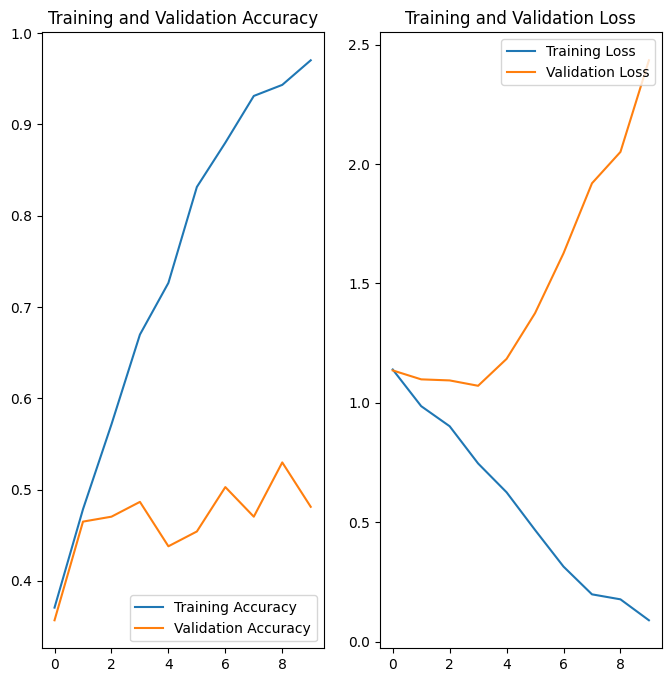

In [198]:
#vizuelizacija na podatocite od treniranjeto
graf(history);

In [199]:
#augmentacija na podatocite
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [200]:
#nova definicija na modelot po augmentacija
num_classes = len(class_names)

model = Sequential([
    data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [201]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [202]:
#povtorno treniranje na modelot po augmentacija
epochs = 10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
24/24 [==============================] - 14s 519ms/step - loss: 1.2347 - accuracy: 0.4030 - val_loss: 1.0937 - val_accuracy: 0.3459
Epoch 2/10
24/24 [==============================] - 13s 534ms/step - loss: 1.0346 - accuracy: 0.4380 - val_loss: 1.0697 - val_accuracy: 0.4162
Epoch 3/10
24/24 [==============================] - 14s 570ms/step - loss: 1.0073 - accuracy: 0.4501 - val_loss: 1.1421 - val_accuracy: 0.3892
Epoch 4/10
24/24 [==============================] - 13s 545ms/step - loss: 0.9790 - accuracy: 0.5000 - val_loss: 1.2604 - val_accuracy: 0.4324
Epoch 5/10
24/24 [==============================] - 13s 523ms/step - loss: 0.9436 - accuracy: 0.5431 - val_loss: 1.2441 - val_accuracy: 0.4649
Epoch 6/10
24/24 [==============================] - 12s 493ms/step - loss: 0.9365 - accuracy: 0.5526 - val_loss: 1.1644 - val_accuracy: 0.4595
Epoch 7/10
24/24 [==============================] - 12s 496ms/step - loss: 0.8959 - accuracy: 0.5863 - val_loss: 1.2764 - val_accuracy: 0.4432

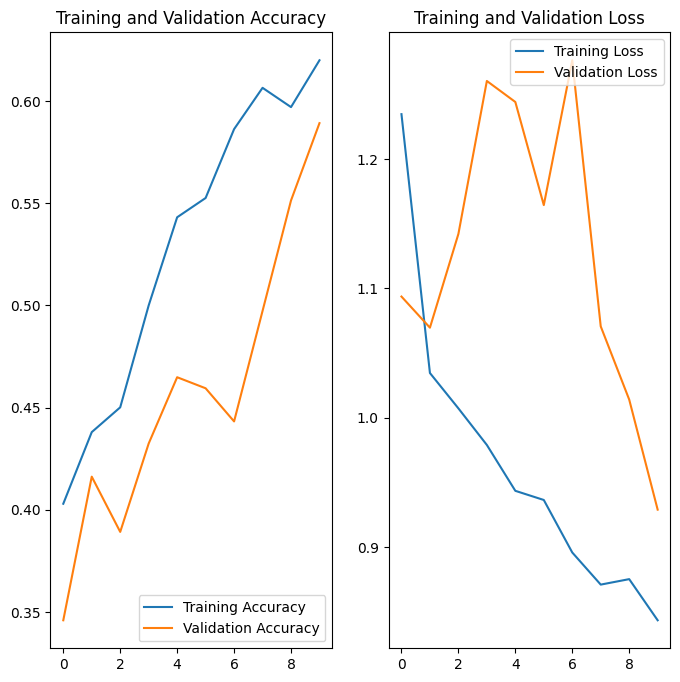

In [203]:
#povtorna vizuelizacija na podatocite
graf(history)

In [204]:
#zacuvuvanje na modelot
model.save('final_model/model')


INFO:tensorflow:Assets written to: final_model/model\assets


INFO:tensorflow:Assets written to: final_model/model\assets
